In [1]:
import yfinance as yf
import numpy as np
import datetime as dt
from scipy.stats import norm
import matplotlib.pyplot as plt
#Financial programmer

In [2]:
ticker=['AAPL','meta','C','DIS','F','MSFT','MS','GME','TSLA','AMZN']
weights=np.array([1/len(ticker) for i in range(len(ticker))])
weights

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [3]:
start=dt.datetime(2019,1,1)
end=dt.datetime(2021,4,7)
df=yf.download(ticker,start,end)['Adj Close']
df

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,C,DIS,F,GME,META,MS,MSFT,TSLA
Date,,,,,,,,,,
2018-12-31,37.951187,75.098503,44.460167,108.326126,6.314889,3.051468,131.089996,34.709221,96.850975,22.186666
2019-01-02,37.994484,76.956497,45.715572,107.654335,6.521258,3.160276,135.679993,35.365765,96.421875,20.674667
2019-01-03,34.209961,75.014000,44.887169,105.046211,6.422200,3.136097,131.740005,34.735493,92.874710,20.024000
2019-01-04,35.670361,78.769501,47.081989,108.286606,6.669843,3.684974,137.949997,36.153618,97.194229,21.179333
2019-01-07,35.590965,81.475502,47.491920,109.225136,6.843193,3.743005,138.050003,36.512531,97.318192,22.330667
...,...,...,...,...,...,...,...,...,...,...
2021-03-30,118.310257,152.764496,67.234726,185.529999,11.154823,48.615002,288.000000,73.765984,227.245758,211.873337
2021-03-31,120.530426,154.703995,67.041199,184.520004,10.966822,47.455002,294.529999,72.432251,231.087875,222.643326
2021-04-01,121.369148,158.050003,67.400597,188.970001,10.895202,47.862499,298.660004,72.954567,237.537201,220.583328


In [4]:
returns=df.pct_change()
returns

,AAPL,AMZN,C,DIS,F,GME,META,MS,MSFT,TSLA
Date,,,,,,,,,,
2018-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-02,0.001141,0.024741,0.028237,-0.006202,0.032680,0.035658,0.035014,0.018916,-0.004431,-0.068149
2019-01-03,-0.099607,-0.025241,-0.018121,-0.024227,-0.015190,-0.007651,-0.029039,-0.017822,-0.036788,-0.031472
2019-01-04,0.042689,0.050064,0.048896,0.030847,0.038560,0.175019,0.047138,0.040826,0.046509,0.057697
2019-01-07,-0.002226,0.034353,0.008707,0.008667,0.025990,0.015748,0.000725,0.009927,0.001275,0.054361
...,...,...,...,...,...,...,...,...,...,...
2021-03-30,-0.012275,-0.006646,0.019279,0.003679,0.025514,0.072587,-0.009697,0.015537,-0.014411,0.039801
2021-03-31,0.018766,0.012696,-0.002878,-0.005444,-0.016854,-0.023861,0.022674,-0.018081,0.016907,0.050832
2021-04-01,0.006959,0.021628,0.005361,0.024117,-0.006531,0.008587,0.014022,0.007211,0.027909,-0.009252


In [5]:
cov_matrix=returns.cov()
cov_matrix

,AAPL,AMZN,C,DIS,F,GME,META,MS,MSFT,TSLA
AAPL,0.000551,0.000310,0.000356,0.000242,0.000248,0.000302,0.000383,0.000353,0.000385,0.000490
AMZN,0.000310,0.000385,0.000180,0.000150,0.000113,0.000108,0.000310,0.000184,0.000300,0.000385
C,0.000356,0.000180,0.000955,0.000480,0.000582,0.000562,0.000306,0.000709,0.000338,0.000436
DIS,0.000242,0.000150,0.000480,0.000556,0.000355,0.000163,0.000230,0.000412,0.000249,0.000261
F,0.000248,0.000113,0.000582,0.000355,0.000779,0.000454,0.000215,0.000502,0.000214,0.000365
GME,0.000302,0.000108,0.000562,0.000163,0.000454,0.015023,0.000123,0.000276,0.000200,0.000539
META,0.000383,0.000310,0.000306,0.000230,0.000215,0.000123,0.000557,0.000284,0.000346,0.000392
MS,0.000353,0.000184,0.000709,0.000412,0.000502,0.000276,0.000284,0.000713,0.000334,0.000376
MSFT,0.000385,0.000300,0.000338,0.000249,0.000214,0.000200,0.000346,0.000334,0.000437,0.000438
TSLA,0.000490,0.000385,0.000436,0.000261,0.000365,0.000539,0.000392,0.000376,0.000438,0.002084


In [6]:
returns.min().mean()

-0.18973722093307396

In [7]:
avg_returns=returns.mean()
avg_returns

AAPL    0.002366
AMZN    0.001535
C       0.001199
DIS     0.001260
F       0.001448
GME     0.010975
META    0.001771
MS      0.001679
MSFT    0.001836
TSLA    0.005162
dtype: float64

In [8]:
count=returns.count()[0]
count

569

In [9]:
port_mean=weights.dot(avg_returns)
port_mean

0.0029230185636182826

In [10]:
port_std=np.sqrt(weights.T.dot((returns.cov()).dot(weights)))
port_std

0.0227854300334105

In [11]:
x=np.arange(-5,5.5,0.1)
x

array([-5.00000000e+00, -4.90000000e+00, -4.80000000e+00, -4.70000000e+00,
       -4.60000000e+00, -4.50000000e+00, -4.40000000e+00, -4.30000000e+00,
       -4.20000000e+00, -4.10000000e+00, -4.00000000e+00, -3.90000000e+00,
       -3.80000000e+00, -3.70000000e+00, -3.60000000e+00, -3.50000000e+00,
       -3.40000000e+00, -3.30000000e+00, -3.20000000e+00, -3.10000000e+00,
       -3.00000000e+00, -2.90000000e+00, -2.80000000e+00, -2.70000000e+00,
       -2.60000000e+00, -2.50000000e+00, -2.40000000e+00, -2.30000000e+00,
       -2.20000000e+00, -2.10000000e+00, -2.00000000e+00, -1.90000000e+00,
       -1.80000000e+00, -1.70000000e+00, -1.60000000e+00, -1.50000000e+00,
       -1.40000000e+00, -1.30000000e+00, -1.20000000e+00, -1.10000000e+00,
       -1.00000000e+00, -9.00000000e-01, -8.00000000e-01, -7.00000000e-01,
       -6.00000000e-01, -5.00000000e-01, -4.00000000e-01, -3.00000000e-01,
       -2.00000000e-01, -1.00000000e-01, -1.77635684e-14,  1.00000000e-01,
        2.00000000e-01,  

In [12]:
norm_dist=norm.pdf(x,(port_mean*100),(port_std*100))
norm_dist

array([0.01179746, 0.01305091, 0.01440975, 0.01587946, 0.0174654 ,
       0.01917276, 0.02100653, 0.02297141, 0.02507173, 0.02731143,
       0.02969396, 0.03222221, 0.03489844, 0.03772421, 0.04070032,
       0.04382672, 0.04710246, 0.05052563, 0.05409328, 0.05780141,
       0.06164489, 0.06561742, 0.06971155, 0.07391862, 0.07822875,
       0.0826309 , 0.08711281, 0.09166111, 0.09626128, 0.1008978 ,
       0.10555413, 0.11021285, 0.11485575, 0.11946392, 0.12401787,
       0.12849767, 0.1328831 , 0.13715376, 0.14128927, 0.14526941,
       0.14907424, 0.15268436, 0.15608099, 0.15924615, 0.16216285,
       0.16481521, 0.16718861, 0.16926984, 0.17104721, 0.17251064,
       0.17365179, 0.17446412, 0.17494297, 0.17508557, 0.1748911 ,
       0.17436068, 0.17349737, 0.17230612, 0.17079377, 0.16896893,
       0.16684191, 0.16442466, 0.16173062, 0.1587746 , 0.15557267,
       0.15214198, 0.14850064, 0.14466754, 0.14066217, 0.13650453,
       0.13221487, 0.12781359, 0.12332106, 0.11875747, 0.11414

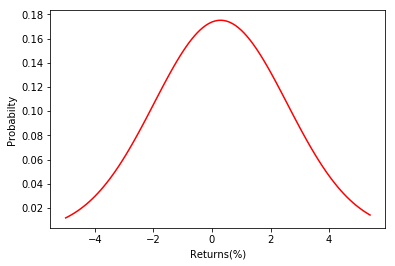

In [13]:
plt.plot(x,norm_dist,color='r')
plt.xlabel('Returns(%)')
plt.ylabel('Probabilty')
plt.show()

In [14]:
18+16+14+10+12+10+8+6+4+2

100

In [15]:
confidence_level=0.05
VaR=norm.ppf(confidence_level,port_mean,port_std)#ppf stands for percent point function
VaR#it mean i have 95% confidence that my portfolio wont lose more than -0.03% in one day

-0.034555678668485995

In [16]:
num_days=22
VaR*np.sqrt(num_days)#it means my portfolio wont lose more than 16% in a month

-0.16208049981806102

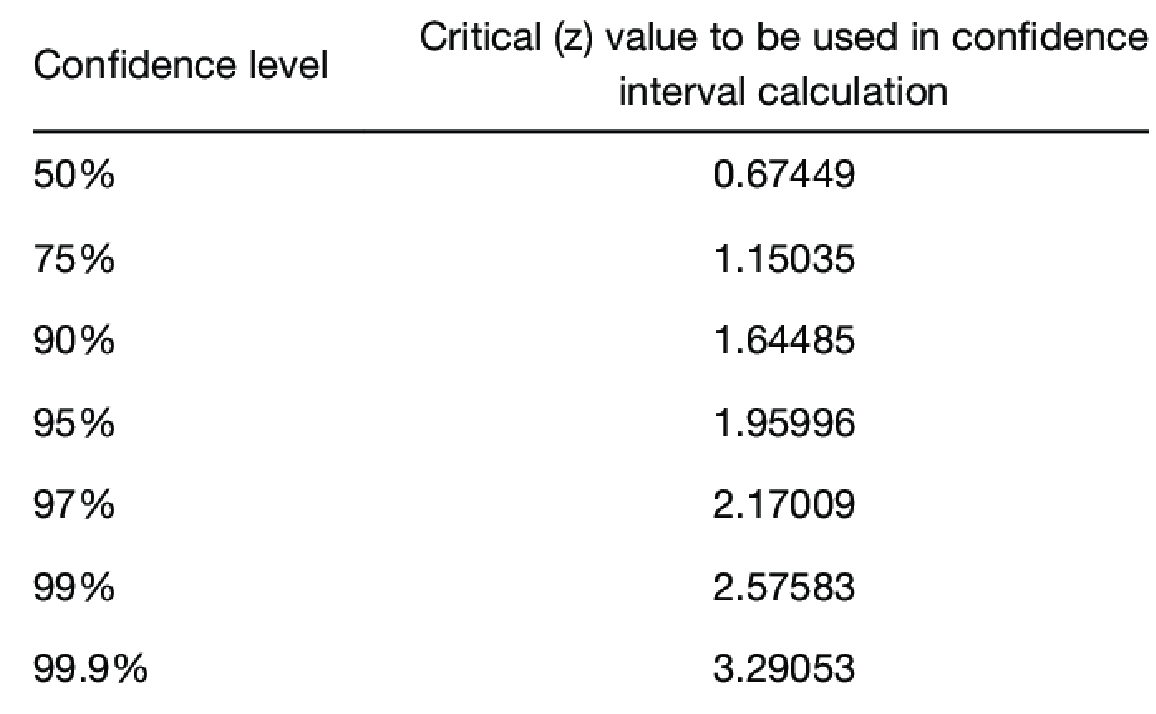

In [17]:
plt.figure(figsize = (20,20))
pic=plt.imread("Critical-z-values-used-in-the-calculation-of-confidence-intervals.png")
plt.imshow(pic)
plt.axis('off')
plt.show()

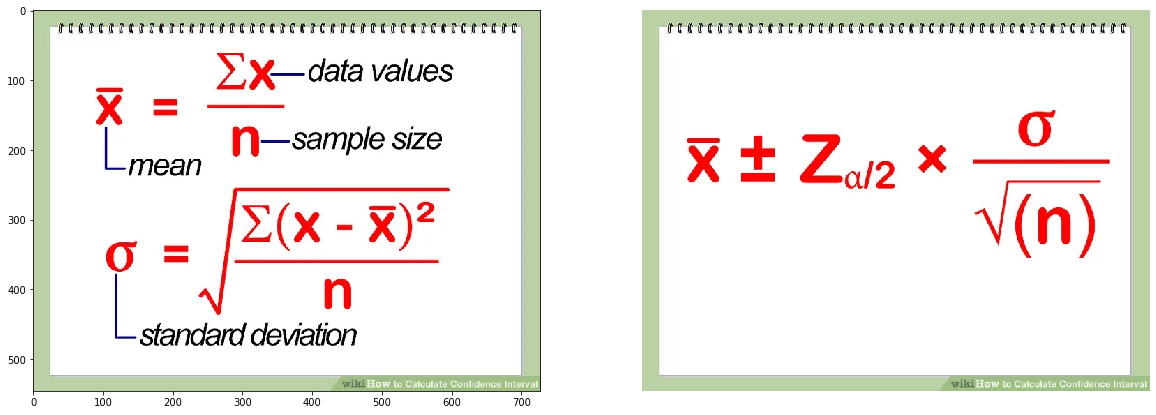

In [18]:
plt.figure(figsize=(20,20))
ax=plt.subplot(2,2,1)
pic=plt.imread("aid1383548-v4-728px-Calculate-Confidence-Interval-Step-3-Version-4.jpg.jpg")
plt.imshow(pic)
ax=plt.subplot(2,2,2)
pic=plt.imread("aid1383548-v4-728px-Calculate-Confidence-Interval-Step-6-Version-4.jpg.jpg")
plt.imshow(pic)
plt.axis('off')
plt.show()

In [19]:
lower=port_mean-1.95996*port_std/np.sqrt(count)
higher=port_mean+1.95996*port_std/np.sqrt(count)

In [20]:
lower

0.0010508355333095664

In [21]:
higher

0.0047952015939269985

In [22]:
#95% confident our daily return would be between higher to lower 